# Project 8 - Working with OLS

Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression. 

An OLS regression with one exogenous variable takes the form. 

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation  yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

## Linear Algebra for OLS

We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set **_X_** on the selected endogenously generate variable $y$. The matrix **_X_** also includes a vector of ones used to estimate the constant $\beta_0$.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix

In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$. 

$\begin{equation*}
X = \begin{bmatrix}
1 & 2 & 1 \\
4 & 1 & 5 \\
6 & 8 & 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$




$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
0 & -4 & 0 & -6 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -4 & 0 & -6 & 0 & 1\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 & 0 & 0 & -17/2 & -1 & 9/4 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 & 0 & 0 & -8.5 & -1 & 2.25 \\
0 & 1 & 0 & 1.5 & 0 & -0.25\\
0 & 0 & 1 & 6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 & -1 & 2.25 \\
1.5 & 0 & -0.25\\
6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

### Linear Algebra in _numpy_

We can check this using linear algebra functions in numpy. We start by creating numpy arrays that we will transform into vectors in the second step. 

In [1]:
import numpy as np
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
                # adds a new line
print(x1,x2,x3, sep = "\n")

[1 2 1]
[4 1 5]
[6 8 6]


In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print(x1,x2,x3, sep = "\n")

[[1 2 1]]
[[4 1 5]]
[[6 8 6]]


In [3]:
X = np.concatenate((x1,x2,x3))
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

In [4]:
X_inverse = X.getI()
X_inverse

matrix([[-8.5 , -1.  ,  2.25],
        [ 1.5 , -0.  , -0.25],
        [ 6.5 ,  1.  , -1.75]])

In [5]:
np.round(X_inverse, 2)

array([[-8.5 , -1.  ,  2.25],
       [ 1.5 , -0.  , -0.25],
       [ 6.5 ,  1.  , -1.75]])

In [6]:
X_transpose = X.getT()
X_transpose

matrix([[1, 4, 6],
        [2, 1, 8],
        [1, 5, 6]])

## Regression Function

Now that we have learned the necessary operations, we can understand the operations of the regression function. If you would like to build your own regression module, reconstruct the scripts form Chapter 7. In this lesson, we will use the statsmodels OLS method to reconstruct and compare statistics from an OLS regression. 

Recall that we estimate the vector of beta parameters for each variable with the equation:

$\beta = (X'X)^{-1}X'Y$

Each estimated $\beta$ value is multiplied by each observation of the relevant exogenous variable estimate the effect of the value on the endogenous, $Y$, value.

We will run a regression In order to estimate the parameters, we will need to import data, define the dependent variable and independent variables, and transform these into matrix objects. 

Let's use the data from chapter 6 with the addition real GDP per capita. This combined set of data is saved in the repository as a file created in chapter 8.

In [8]:
import pandas as pd
mgdp = pd.read_excel("https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx", 
                   index_col = [0,2],
                   parse_dates = True, 
                    sheet_name = "Full data")
mgdp

country      gdppc          pop
countrycode year                                     
AFG         1820  Afghanistan        NaN   3280.00000
            1870  Afghanistan        NaN   4207.00000
            1913  Afghanistan        NaN   5730.00000
            1950  Afghanistan  1156.0000   8150.00000
            1951  Afghanistan  1170.0000   8284.00000
...                       ...        ...          ...
ZWE         2014     Zimbabwe  1594.0000  13313.99205
            2015     Zimbabwe  1560.0000  13479.13812
            2016     Zimbabwe  1534.0000  13664.79457
            2017     Zimbabwe  1582.3662  13870.26413
            2018     Zimbabwe  1611.4052  14096.61179

[21682 rows x 3 columns]

In [9]:
filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename,
                    index_col = [2,0],
                    header = [0],
                    sheet_name = "EFW Panel Data 2022 Report")
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Panel Data Summary Index,Area 1,Area 2,Area 3,Area 4,Area 5,Standard Deviation of the 5 EFW Areas
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}
data = data.dropna(how = "all", axis = 1).rename(columns = rename)
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data["RGDP Per Capita"] = mgdp["gdppc"]
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita
ISO_Code_3,Year,,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742,NaN
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103,NaN
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854,NaN
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924,NaN
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426,15289.0
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1172.0
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.0


In [12]:
# deleting a column in the df
del data["Standard Deviation of the 5 EFW Areas"]
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,NaN
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,NaN
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,NaN
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,NaN
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,15289.0
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,1172.0
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,1961.0


In [13]:
!pip install xlwt
data.to_excel("EFWAndRGDP.xls")

C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\1529978560.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel("EFWAndRGDP.xls")


In [14]:
data.keys()

Index(['ISO_Code_2', 'World Bank Region',
       'World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)',
       'Countries', 'Summary', 'Size of Government',
       'Legal System and Property Rights', 'Sound Money',
       'Freedom to Trade Internationally', 'Regulation', 'RGDP Per Capita'],
      dtype='object')

In [15]:
# drop all columns before the fourth column
data = data[data.keys()[3:]]
data

,,Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
ISO_Code_3,Year,,,,,,,,
ALB,2020,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,NaN
DZA,2020,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,NaN
AGO,2020,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,NaN
ARG,2020,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,NaN
ARM,2020,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,NaN
...,...,...,...,...,...,...,...,...,...
VEN,1970,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,15289.0
VNM,1970,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,1172.0
YEM,1970,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,1961.0


In [16]:
# do this to sort the df by earliest to latest
data.sort_index(inplace = True)
data

C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\95201408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace = True)


Countries   Summary  Size of Government  \
ISO_Code_3 Year                                           
AGO        1970    Angola       NaN                 NaN   
           1975    Angola       NaN                 NaN   
           1980    Angola       NaN                 NaN   
           1985    Angola       NaN                 NaN   
           1990    Angola       NaN                 NaN   
...                   ...       ...                 ...   
ZWE        2016  Zimbabwe  6.121996            5.332597   
           2017  Zimbabwe  5.599886            4.699843   
           2018  Zimbabwe  5.876298            5.170946   
           2019  Zimbabwe  4.719465            5.628359   
           2020  Zimbabwe  4.480000            5.562008   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        1970                               NaN          NaN   
           1975                               NaN          NaN   
           1980                               NaN          NaN   
           1985                               NaN          NaN   
           1990                               NaN          NaN   
...                                           ...          ...   
ZWE        2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   
           2019                          4.026568     1.413372   
           2020                          3.965267     1.250000   

                 Freedom to Trade Internationally  Regulation  RGDP Per Capita  
ISO_Code_3 Year                                                                 
AGO        1970                               NaN         NaN        2818.0000  
           1975                               NaN         NaN        1710.0000  
           1980                               NaN         NaN        1532.0000  
           1985                               NaN         NaN        1242.0000  
           1990                               NaN         NaN        1384.0000  
...                                           ...         ...              ...  
ZWE        2016                          6.404937    6.520805        1534.0000  
           2017                          4.503965    6.399757        1582.3662  
           2018                          6.396649    6.303135        1611.4052  
           2019                          6.397045    6.132583              NaN  
           2020                          5.565207    6.080774              NaN  

[4455 rows x 8 columns]

In [17]:
reg_vars = list(data.keys())
reg_vars

['Countries',
 'Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [18]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[2:-1]
y_var, x_vars

(['RGDP Per Capita'],
 ['Size of Government',
  'Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation'])

In [23]:
reg_data = data[reg_vars].dropna()

In [24]:
import statsmodels.api as sm
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y,X).fit()


C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\3289480196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     593.5
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:33:42   Log-Likelihood:                -34081.
No. Observations:                3145   AIC:                         6.817e+04
Df Residuals:                    3139   BIC:                         6.821e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2752.2138    202.274    -13.606      0.000   -3148.817   -2355.611
Legal System and Property Rights  3966.0733    196.152     20.219      0.000    3581.474    4350.672
Sound Money                        902.3584    177.099      5.095      0.000     555.117    1249.599
Freedom to Trade Internationally  1279.8725    211.796      6.043      0.000     864.601    1695.144
Regulation                        2141.0305    281.044      7.618      0.000    1589.982    2692.079
Constant                          -1.66e+04   1627.397    -10.197      0.000   -1.98e+04   -1.34e+04
==============================================================================
Omnibus:                     2952.722   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189244.770
Skew:                           4.324   Prob(JB):                         0.00
Kurtosis:                      40.005   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# add a predictor column into the df
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                           
AGO        2005    Angola  4.214590            6.886311   
           2006    Angola  4.531179            5.162277   
           2007    Angola  4.550966            4.963676   
           2008    Angola  4.643633            4.715589   
           2009    Angola  5.251115            7.455501   
...                   ...       ...                 ...   
ZWE        2014  Zimbabwe  5.999147            6.771807   
           2015  Zimbabwe  6.449595            6.964753   
           2016  Zimbabwe  6.121996            5.332597   
           2017  Zimbabwe  5.599886            4.699843   
           2018  Zimbabwe  5.876298            5.170946   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                          3.129619     1.270081   
           2006                          3.238314     3.807267   
           2007                          3.224507     4.015297   
           2008                          3.382642     4.653201   
           2009                          3.394515     4.901540   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        2005                          5.356979    4.511067   
           2006                          5.302944    5.118114   
           2007                          5.139768    5.348260   
           2008                          5.181950    5.185843   
           2009                          5.503538    5.007256   
...                                           ...         ...   
ZWE        2014                          6.398692    5.039824   
           2015                          6.509231    6.555970   
           2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per Capita Predictor  
ISO_Code_3 Year                                              
AGO        2005        3708.7706               -5474.902171  
           2006        4592.3373                3221.099672  
           2007        5773.5483                4184.555105  
           2008        6743.7482                5776.385317  
           2009        7087.6041               -1464.025089  
...                          ...                        ...  
ZWE        2014        1594.0000                6250.400915  
           2015        1560.0000                9989.206335  
           2016        1534.0000               14271.539452  
           2017        1582.3662               13288.328954  
           2018        1611.4052               13484.096702  

[3145 rows x 9 columns]

In [27]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]

In [28]:
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean).pow(2)
reg_data["Squared Residuals"] = y.sub(y_hat).pow(2)
reg_data["Squared Totals"] = y.sub(y_mean).pow(2)
reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                           
AGO        2005    Angola  4.214590            6.886311   
           2006    Angola  4.531179            5.162277   
           2007    Angola  4.550966            4.963676   
           2008    Angola  4.643633            4.715589   
           2009    Angola  5.251115            7.455501   
...                   ...       ...                 ...   
ZWE        2014  Zimbabwe  5.999147            6.771807   
           2015  Zimbabwe  6.449595            6.964753   
           2016  Zimbabwe  6.121996            5.332597   
           2017  Zimbabwe  5.599886            4.699843   
           2018  Zimbabwe  5.876298            5.170946   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                          3.129619     1.270081   
           2006                          3.238314     3.807267   
           2007                          3.224507     4.015297   
           2008                          3.382642     4.653201   
           2009                          3.394515     4.901540   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        2005                          5.356979    4.511067   
           2006                          5.302944    5.118114   
           2007                          5.139768    5.348260   
           2008                          5.181950    5.185843   
           2009                          5.503538    5.007256   
...                                           ...         ...   
ZWE        2014                          6.398692    5.039824   
           2015                          6.509231    6.555970   
           2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per Capita Predictor     Residuals  \
ISO_Code_3 Year                                                             
AGO        2005        3708.7706               -5474.902171   9183.672771   
           2006        4592.3373                3221.099672   1371.237628   
           2007        5773.5483                4184.555105   1588.993195   
           2008        6743.7482                5776.385317    967.362883   
           2009        7087.6041               -1464.025089   8551.629189   
...                          ...                        ...           ...   
ZWE        2014        1594.0000                6250.400915  -4656.400915   
           2015        1560.0000                9989.206335  -8429.206335   
           2016        1534.0000               14271.539452 -12737.539452   
           2017        1582.3662               13288.328954 -11705.962754   
           2018        1611.4052               13484.096702 -11872.691502   

                 Squared Explained  Squared Residuals  Squared Totals  
ISO_Code_3 Year                                                        
AGO        2005       4.693919e+08       8.433985e+07    1.557949e+08  
           2006       1.682067e+08       1.880293e+06    1.345186e+08  
           2007       1.441440e+08       2.524899e+06    1.085140e+08  
           2008       1.084549e+08       9.357909e+05    8.924211e+07  
           2009       3.116841e+08       7.313036e+07    8.286367e+07  
...                            ...   

In [29]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR, SSE, SST

(450042843462.084, 476075689815.2105, 926118533277.2952)

# Calculate Estimator Variance 
With the sum of squared errors calculated, the next step is to calculate the estimator variance and use this to construct the covariance matrix. The covariance matrix is used to derive the standard errors and related statistics for each estimated coefficient.

We estimate the variance of the error term of the estimator for the dependent variable. 

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom. 

Finally, we calculate the covariance matrix, $(X'X)^{-1}$:

$\sigma^2 (X'X)^{-1}$

In [30]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n,k,estimator_variance

(3145.0, 6, 151664762.60439965)

In [31]:
cov_matrix = results.cov_params()
cov_matrix

,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Constant
Size of Government,40914.793154,15255.069988,-1703.383623,-8958.214157,-10448.584144,-2.067504e+05
Legal System and Property Rights,15255.069988,38475.583705,-2060.902767,-14360.980502,-22112.680701,-4.271058e+04
Sound Money,-1703.383623,-2060.902767,31363.960883,-15910.601600,-10972.822920,-4.080877e+04
Freedom to Trade Internationally,-8958.214157,-14360.980502,-15910.601600,44857.357302,-14664.804830,5.259640e+04
Regulation,-10448.584144,-22112.680701,-10972.822920,-14664.804830,78985.583047,-1.570828e+05
Constant,-206750.428690,-42710.577560,-40808.774501,52596.396443,-157082.849671,2.648421e+06


In [32]:
# calculate covariance matrix by hand 
XtXInv = np.matrix(np.matmul(X.T,X)).getI()
# multiply by estimator variance
ev_mul_XtXInv = estimator_variance * XtXInv
# transform to pandas dataframe
pd.DataFrame(ev_mul_XtXInv,
             columns = X.keys(), index = X.keys())

C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\118751683.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  XtXInv = np.matrix(np.matmul(X.T,X)).getI()


,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Constant
Size of Government,40914.793154,15255.069988,-1703.383623,-8958.214157,-10448.584144,-2.067504e+05
Legal System and Property Rights,15255.069988,38475.583705,-2060.902767,-14360.980502,-22112.680701,-4.271058e+04
Sound Money,-1703.383623,-2060.902767,31363.960883,-15910.601600,-10972.822920,-4.080877e+04
Freedom to Trade Internationally,-8958.214157,-14360.980502,-15910.601600,44857.357302,-14664.804830,5.259640e+04
Regulation,-10448.584144,-22112.680701,-10972.822920,-14664.804830,78985.583047,-1.570828e+05
Constant,-206750.428690,-42710.577560,-40808.774501,52596.396443,-157082.849671,2.648421e+06


In [33]:
results.params

Size of Government                  -2752.213782
Legal System and Property Rights     3966.073311
Sound Money                           902.358447
Freedom to Trade Internationally     1279.872496
Regulation                           2141.030500
Constant                           -16595.251456
dtype: float64

In [34]:
parameters = {}
print("beta", "\t\t\tSE")
for x_var in X.keys():
    beta_x = results.params[x_var]
    StdErrX = cov_matrix.loc[x_var][x_var] **(.5)
   # print(beta_x, StdErrX, sep = "\t")
    # print("t:", beta_x / StdErrX)
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = beta_x
    parameters[x_var]["SE"] = StdErrX
    parameters[x_var]["t-stats"] = beta_x / StdErrX
parameters = pd.DataFrame(parameters).T
parameters

beta 			SE


,Beta,SE,t-stats
Size of Government,-2752.213782,202.274055,-13.606361
Legal System and Property Rights,3966.073311,196.151940,20.219394
Sound Money,902.358447,177.098732,5.095228
Freedom to Trade Internationally,1279.872496,211.795555,6.042962
Regulation,2141.030500,281.043739,7.618140
Constant,-16595.251456,1627.397087,-10.197420


 # Calculate $R^2$

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables. 

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST.

In [35]:
# SSR explained variance
# SST is total
r2 = SSR / SST
r2

0.48594518659452607

### Adjusted R-Squared
Although the $R^2$ is a useful measure to understand the quality of the explanation provided by the selected exogenous variables. Recall that:

$R^2 = \frac{SSR}{SST}$


Notice that as the degrees of freedom decrease, the numerator necessarily decreases as well. One should not depend solely on the adjusted $R^2$ to consider the strength of a regression's results, but it is often useful to help gauge whether or not a marginal addition of a variable improves explanatory power of a regression.

${R^2}_{Adjusted} = 1 - \frac{\frac{SSE}{n - k}}{\frac{SST}{n-1}}$


In [36]:
# as you add more variables your r2_adjusted will get smaller
r2_adjusted = 1 - (SSE / (n-k)) / (SST / (n -1))
r2_adjusted

0.48512636720394786

### Check the distribution of residuals

(array([-50000., -25000.,      0.,  25000.,  50000.,  75000., 100000.,
        125000., 150000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

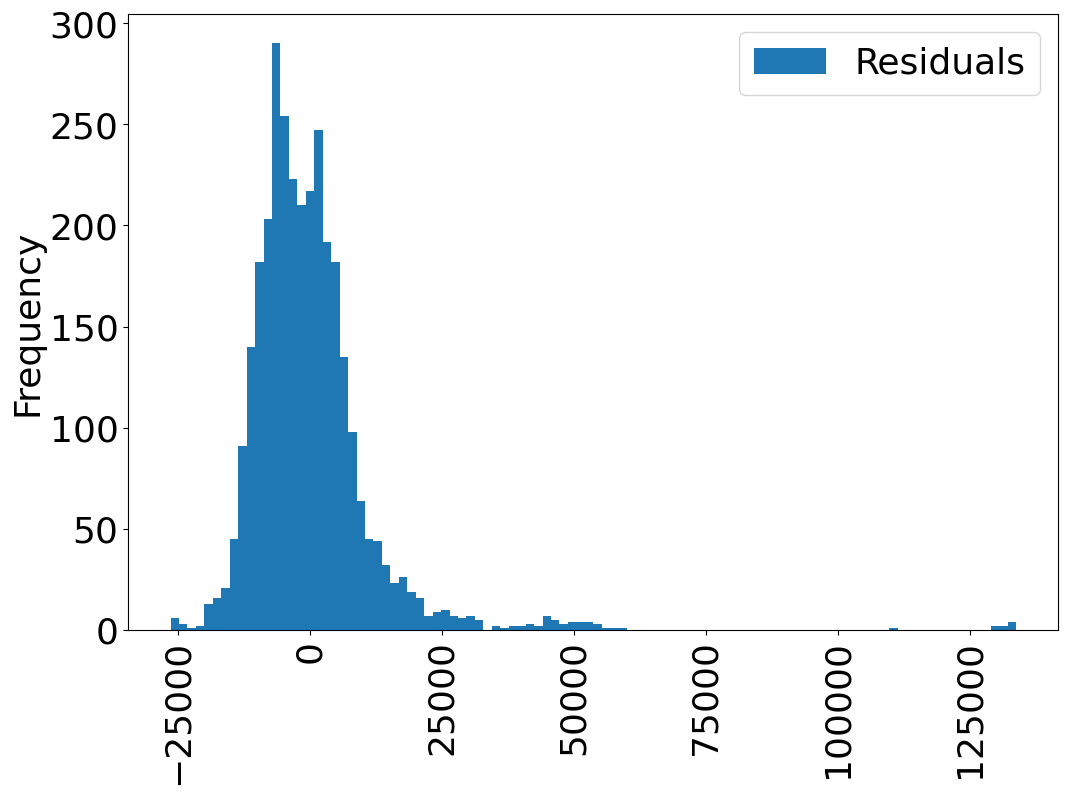

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation = 90)

### Thinking through unit-root and cointegration problems

<AxesSubplot:xlabel='Year'>

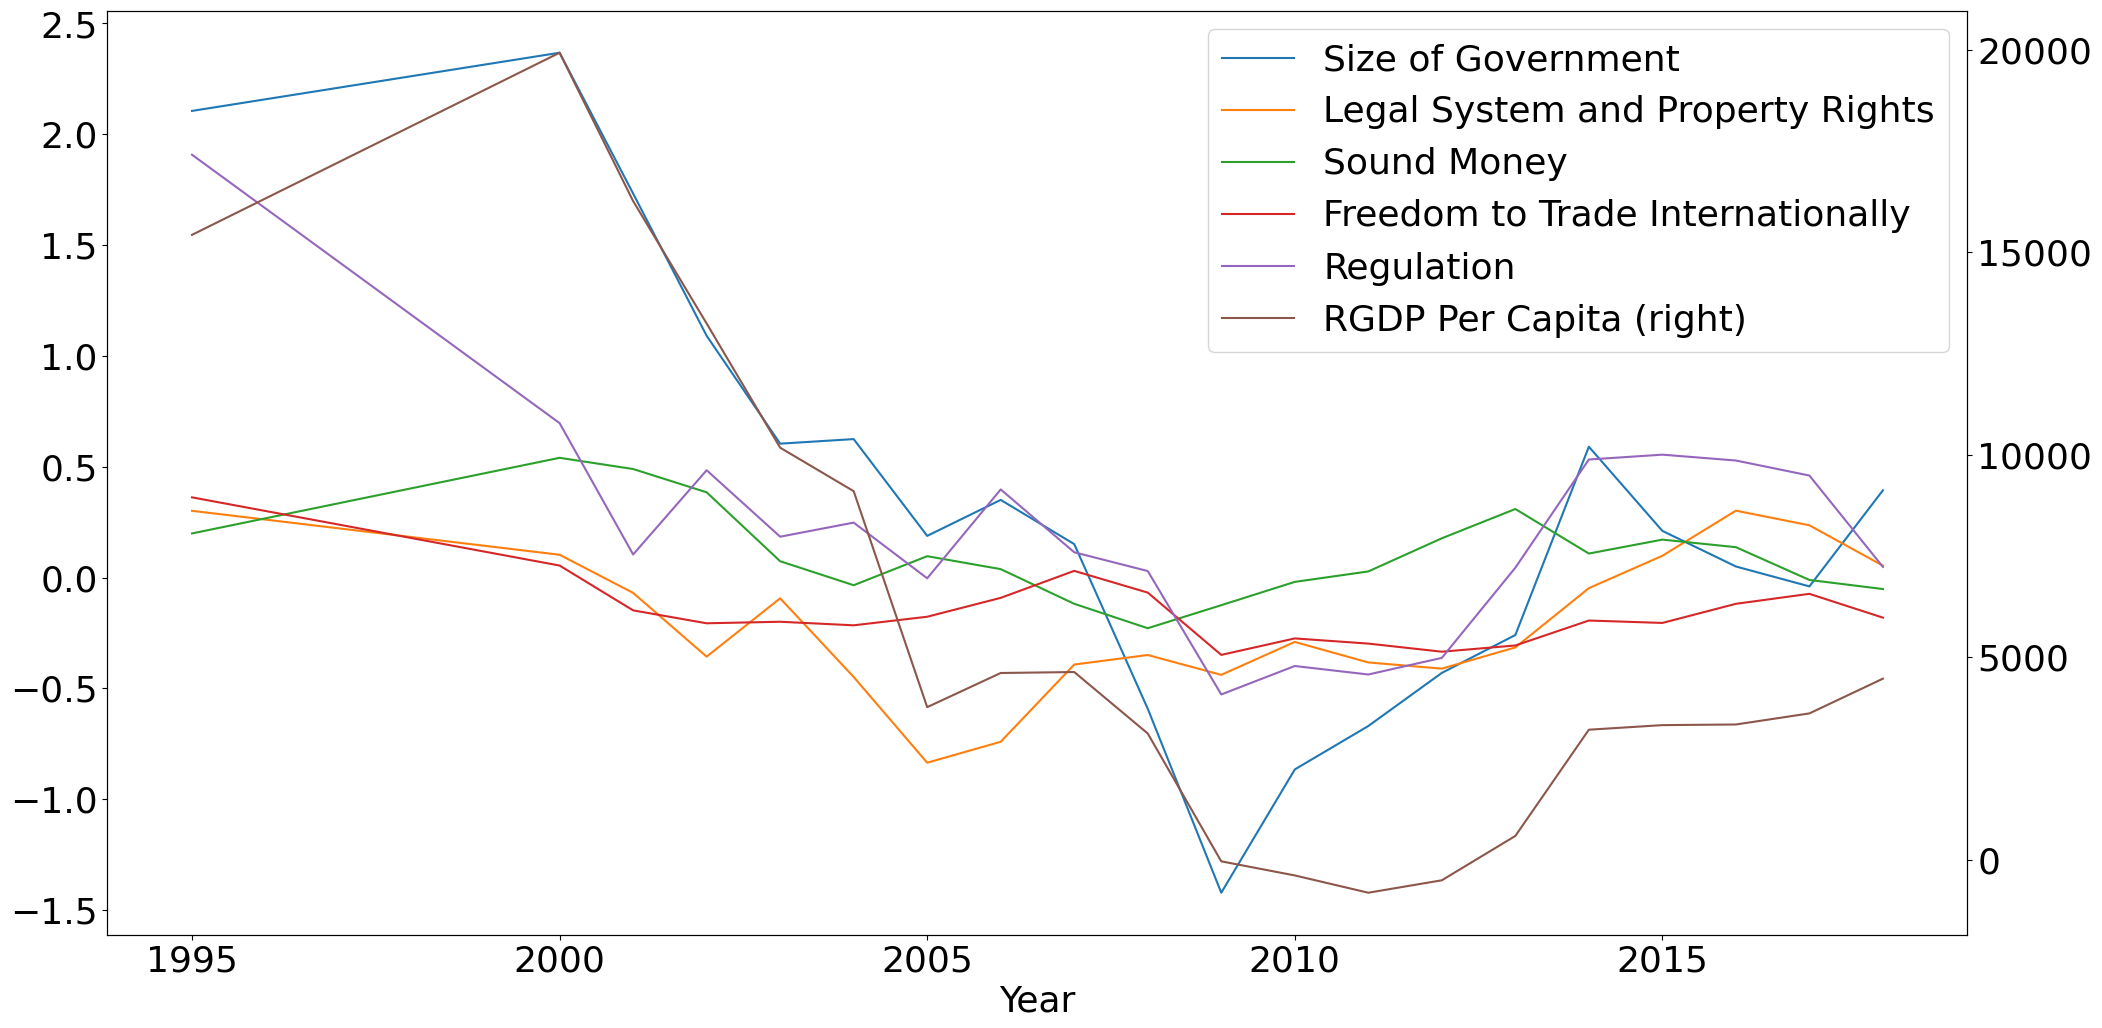

In [38]:
plot_df = data.loc["USA"][x_vars + y_var]
fig, ax = plt.subplots(figsize = (24,12))
plot_df.diff(5).dropna().plot.line(ax = ax, secondary_y = y_var, legend = True)


<AxesSubplot:ylabel='Frequency'>

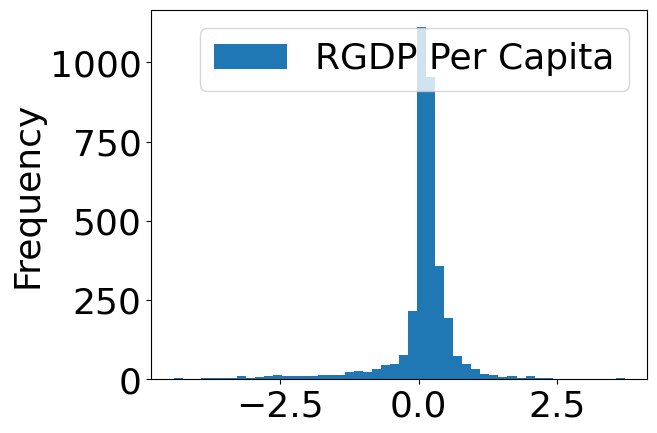

In [39]:
np.log(data[y_var]).diff(5).plot.hist(bins = 50)

### Warning: having more recent data biases estimates toward the present
### inferences from present data

In [53]:
## Regressions with logged differenes
years_diff = 5
reg_data = data
# take the log of real gdp then difference within group
reg_data["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby("ISO_Code_3").diff(years_diff) 
reg_data = reg_data.replace([np.inf, -np.inf], np.NaN)
reg_data.loc["USA"]


C:\Users\adamp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\2649163606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby("ISO_Code_3").diff(years_diff)


,Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
Year,,,,,,,,
1970,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,NaN
1975,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,NaN
1980,United States,8.101368,5.788734,8.684269,9.122306,8.544966,8.359863,NaN
1985,United States,8.295413,6.582616,8.726823,9.339660,8.505198,8.335644,NaN
1990,United States,8.461126,7.262163,8.350956,9.669842,8.537828,8.477998,NaN
1995,United States,8.588435,7.446569,8.587870,9.787931,8.594211,8.538840,NaN
2000,United States,8.648077,7.704726,8.773170,9.607665,8.466601,8.739485,NaN
2001,United States,8.509072,7.521319,8.615158,9.612028,8.397002,8.464019,NaN
2002,United States,8.568646,7.673536,8.370127,9.724310,8.298912,8.819880,NaN


In [41]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
r_df["Residuals"] = results.resid
results.summary()

C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\409861495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\409861495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()
C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\409861495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     18.10
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.06e-17
Time:                        11:33:55   Log-Likelihood:                -89.612
No. Observations:                2719   AIC:                             191.2
Df Residuals:                    2713   BIC:                             226.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0032      0.005      0.704      0.481      -0.006       0.012
Legal System and Property Rights     0.0039      0.005      0.834      0.405      -0.005       0.013
Sound Money                         -0.0141      0.004     -3.137      0.002      -0.023      -0.005
Freedom to Trade Internationally     0.0356      0.006      6.079      0.000       0.024       0.047
Regulation                           0.0039      0.007      0.593      0.553      -0.009       0.017
Constant                            -0.0222      0.040     -0.554      0.580      -0.101       0.056
==============================================================================
Omnibus:                      848.053   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6157.923
Skew:                           1.280   Prob(JB):                         0.00
Kurtosis:                       9.914   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

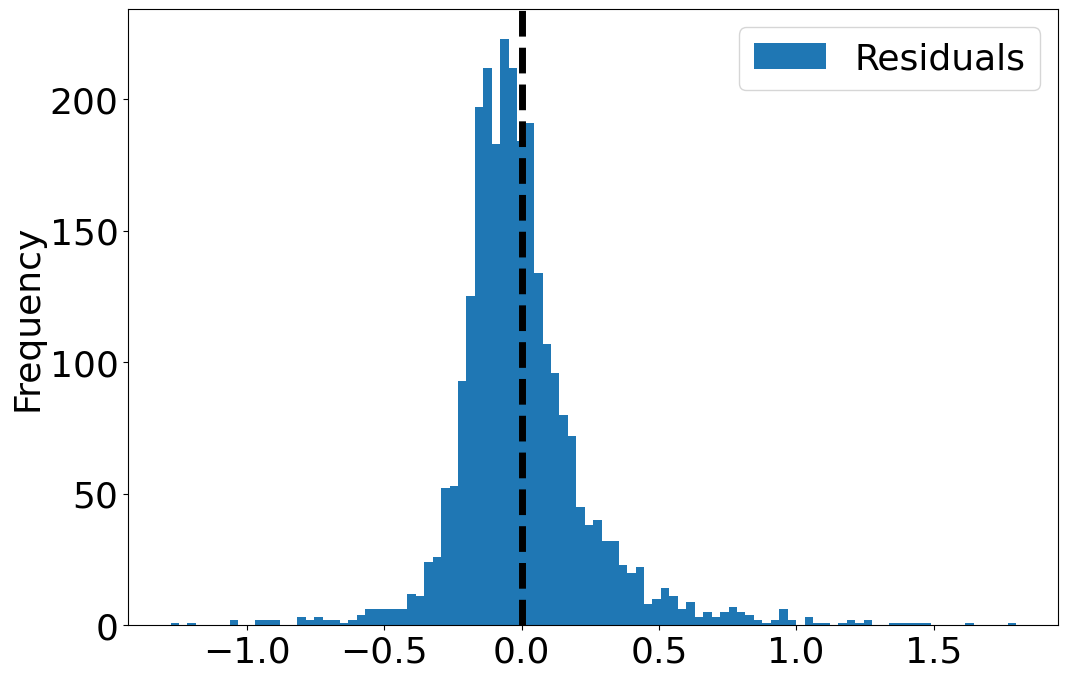

In [42]:
fig, ax = plt.subplots(figsize = (12,8))
r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)
ax.axvline(r_df["Residuals"].mean(), ls = "--", linewidth = 5, color = "k")


In [43]:
results_dict = {"Beta":results.params,
               "t-stats": results.tvalues,
               "p-values":results.pvalues,
               "SE":results.bse}
results_df = pd.DataFrame(results_dict).round(3)
results_df.to_csv("y = RGPDPC, X = EFW, LogDiffResults.csv")
results_df

,Beta,t-stats,p-values,SE
Size of Government,0.003,0.704,0.481,0.005
Legal System and Property Rights,0.004,0.834,0.405,0.005
Sound Money,-0.014,-3.137,0.002,0.004
Freedom to Trade Internationally,0.036,6.079,0.000,0.006
Regulation,0.004,0.593,0.553,0.007
Constant,-0.022,-0.554,0.580,0.040


<AxesSubplot:xlabel='RGDP Per Capita', ylabel='Predictor'>

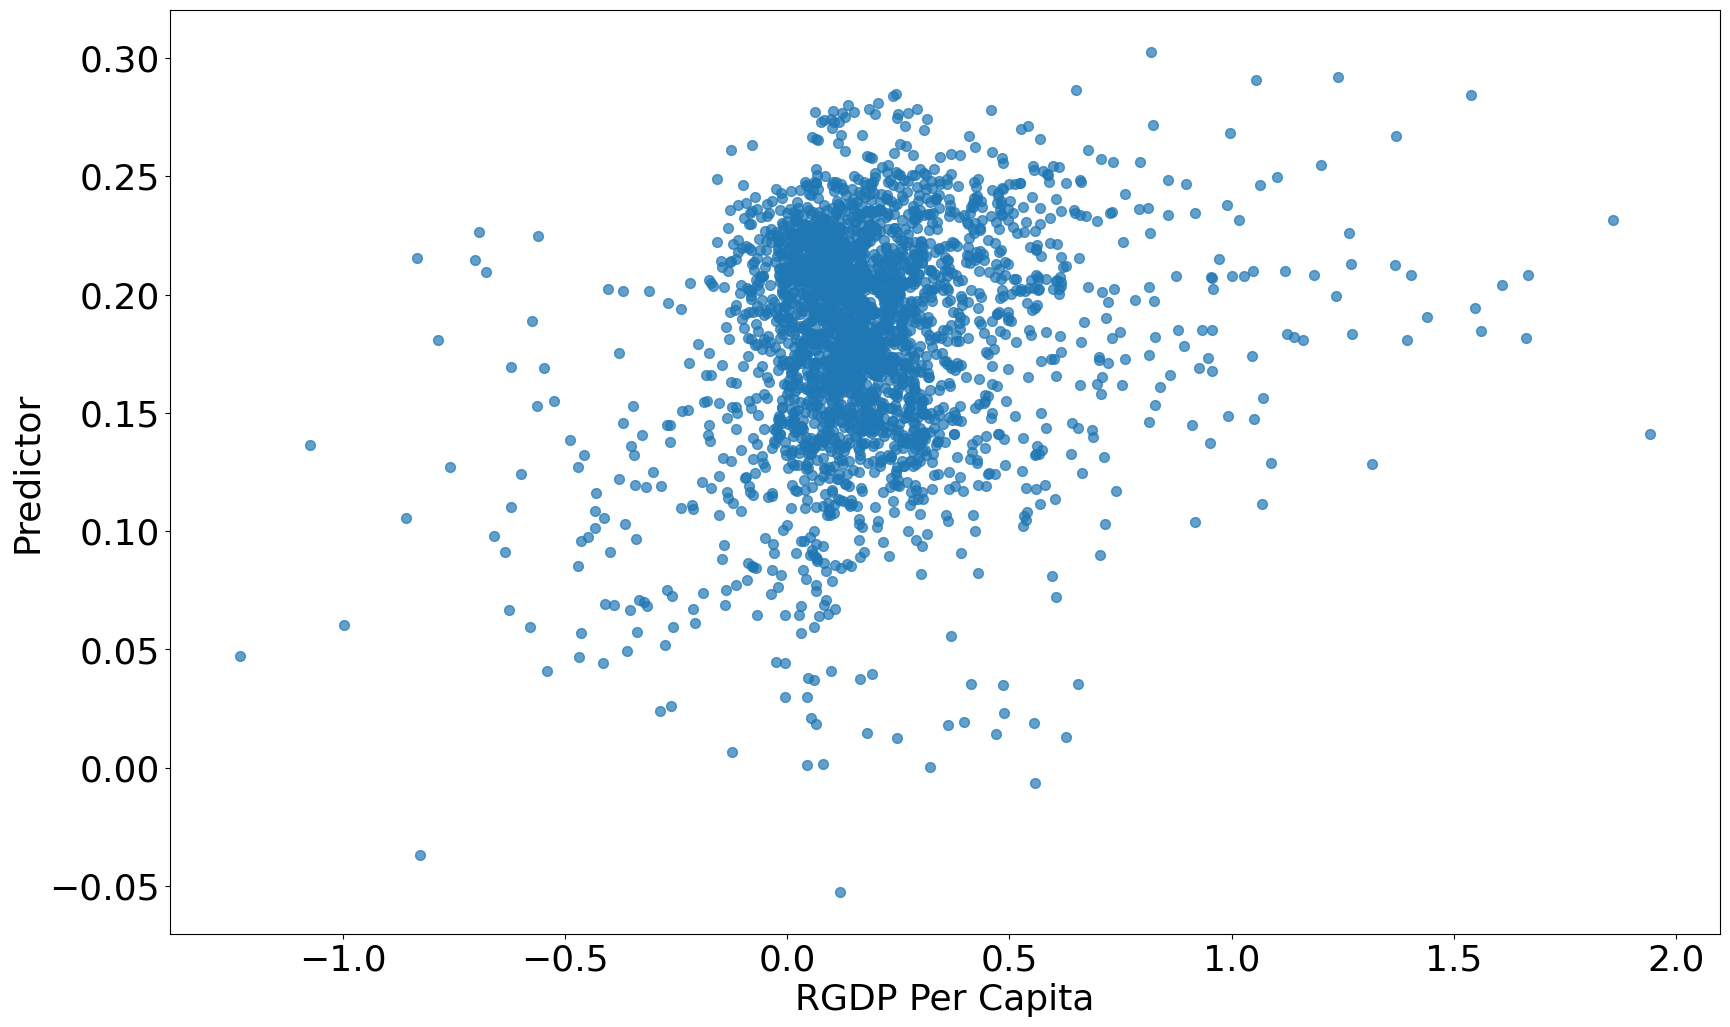

In [44]:
fig, ax = plt.subplots(figsize = (20,12))
r_df.plot.scatter(x = y_var[0],
                 y = "Predictor",
                 s = 50,
                 alpha = .7,
                 ax = ax)

In [60]:
countries = reg_data.groupby("ISO_Code").mean().index
plot_data = reg_data[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

KeyError: 'ISO_Code'

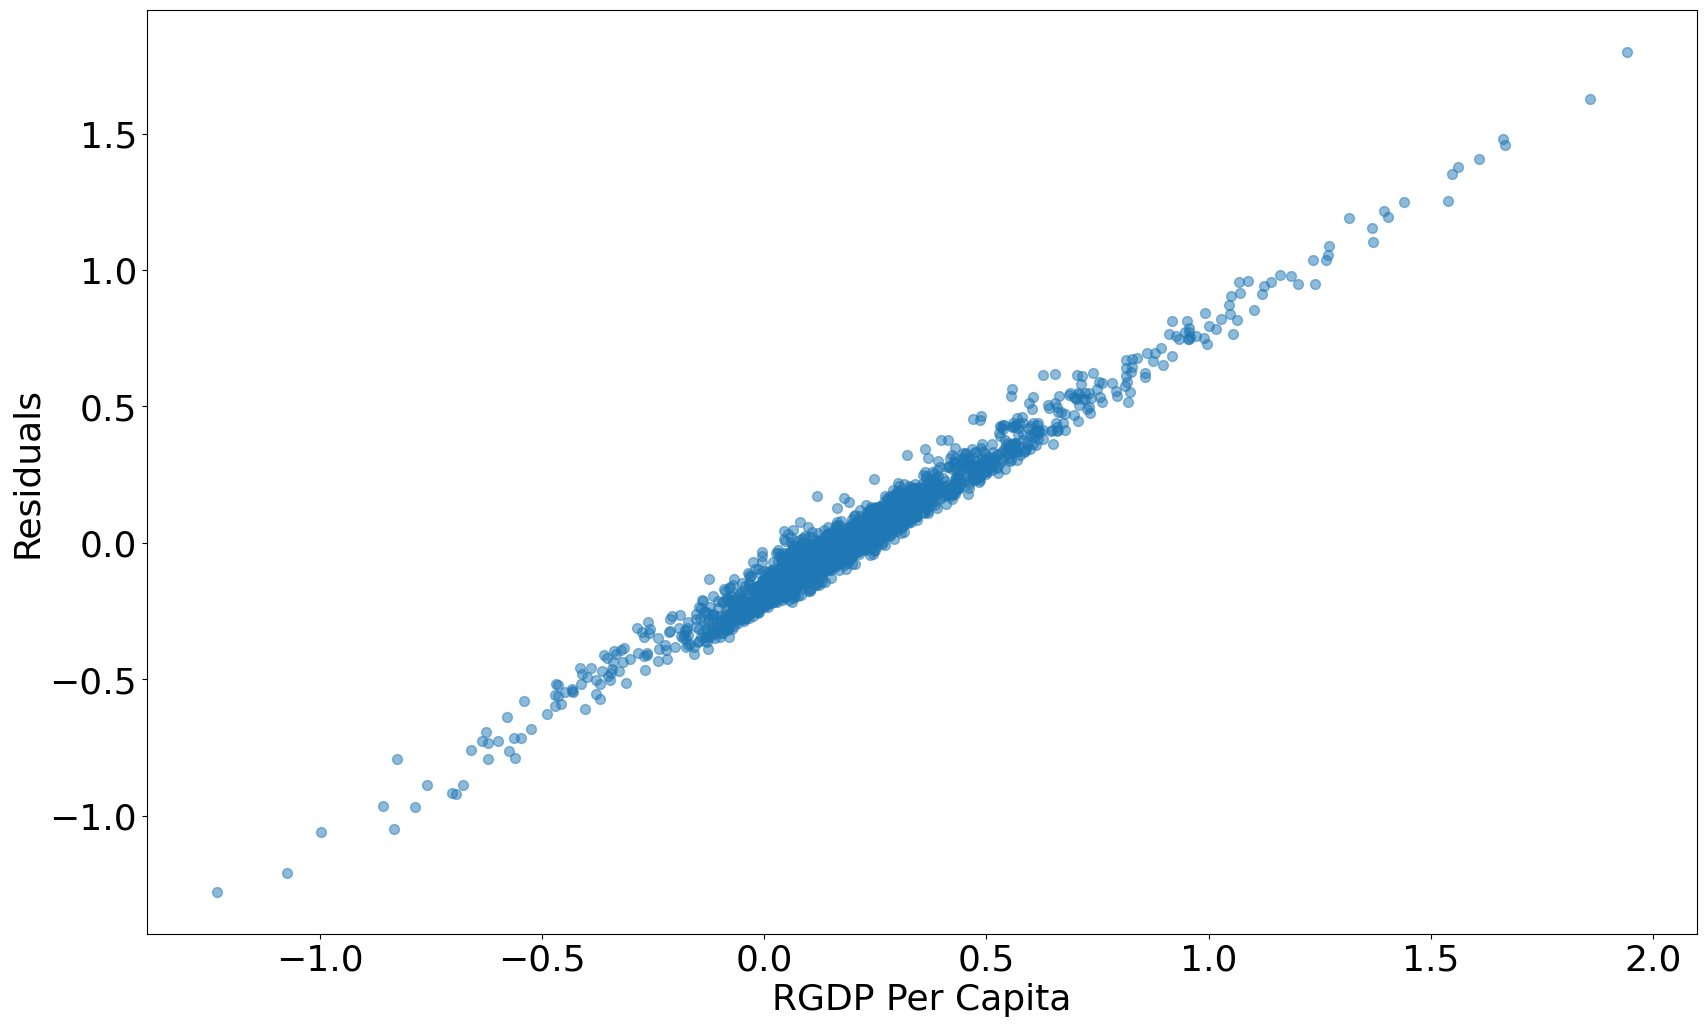

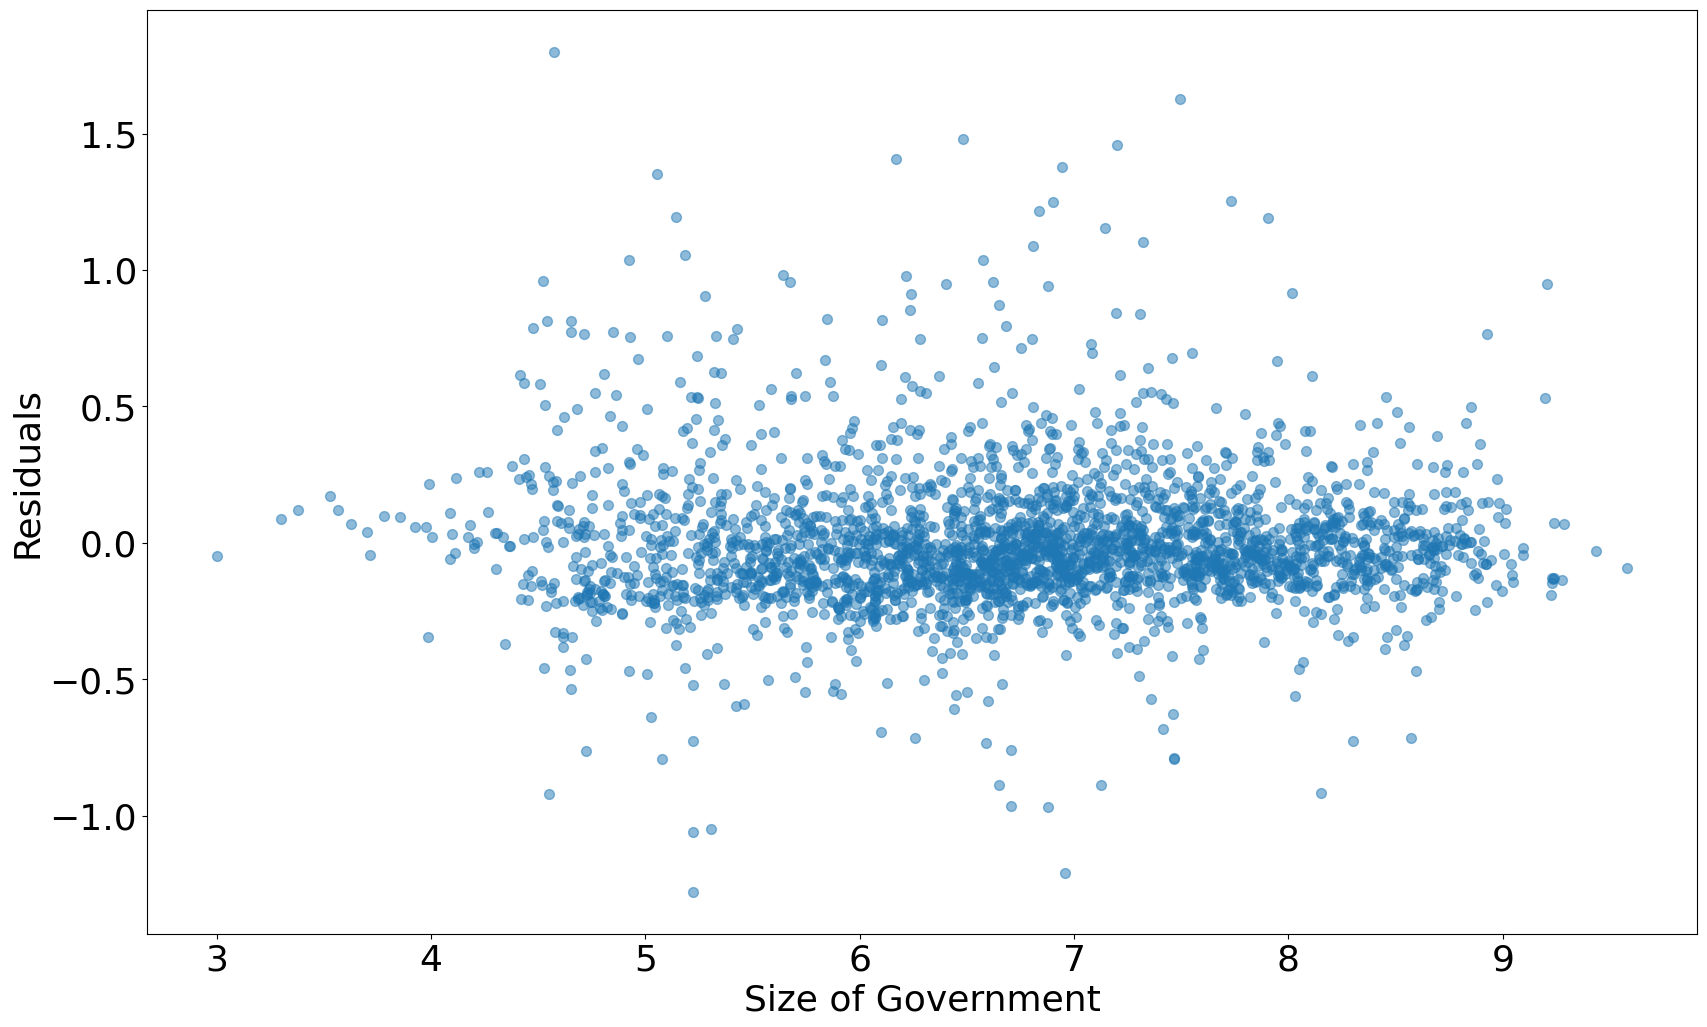

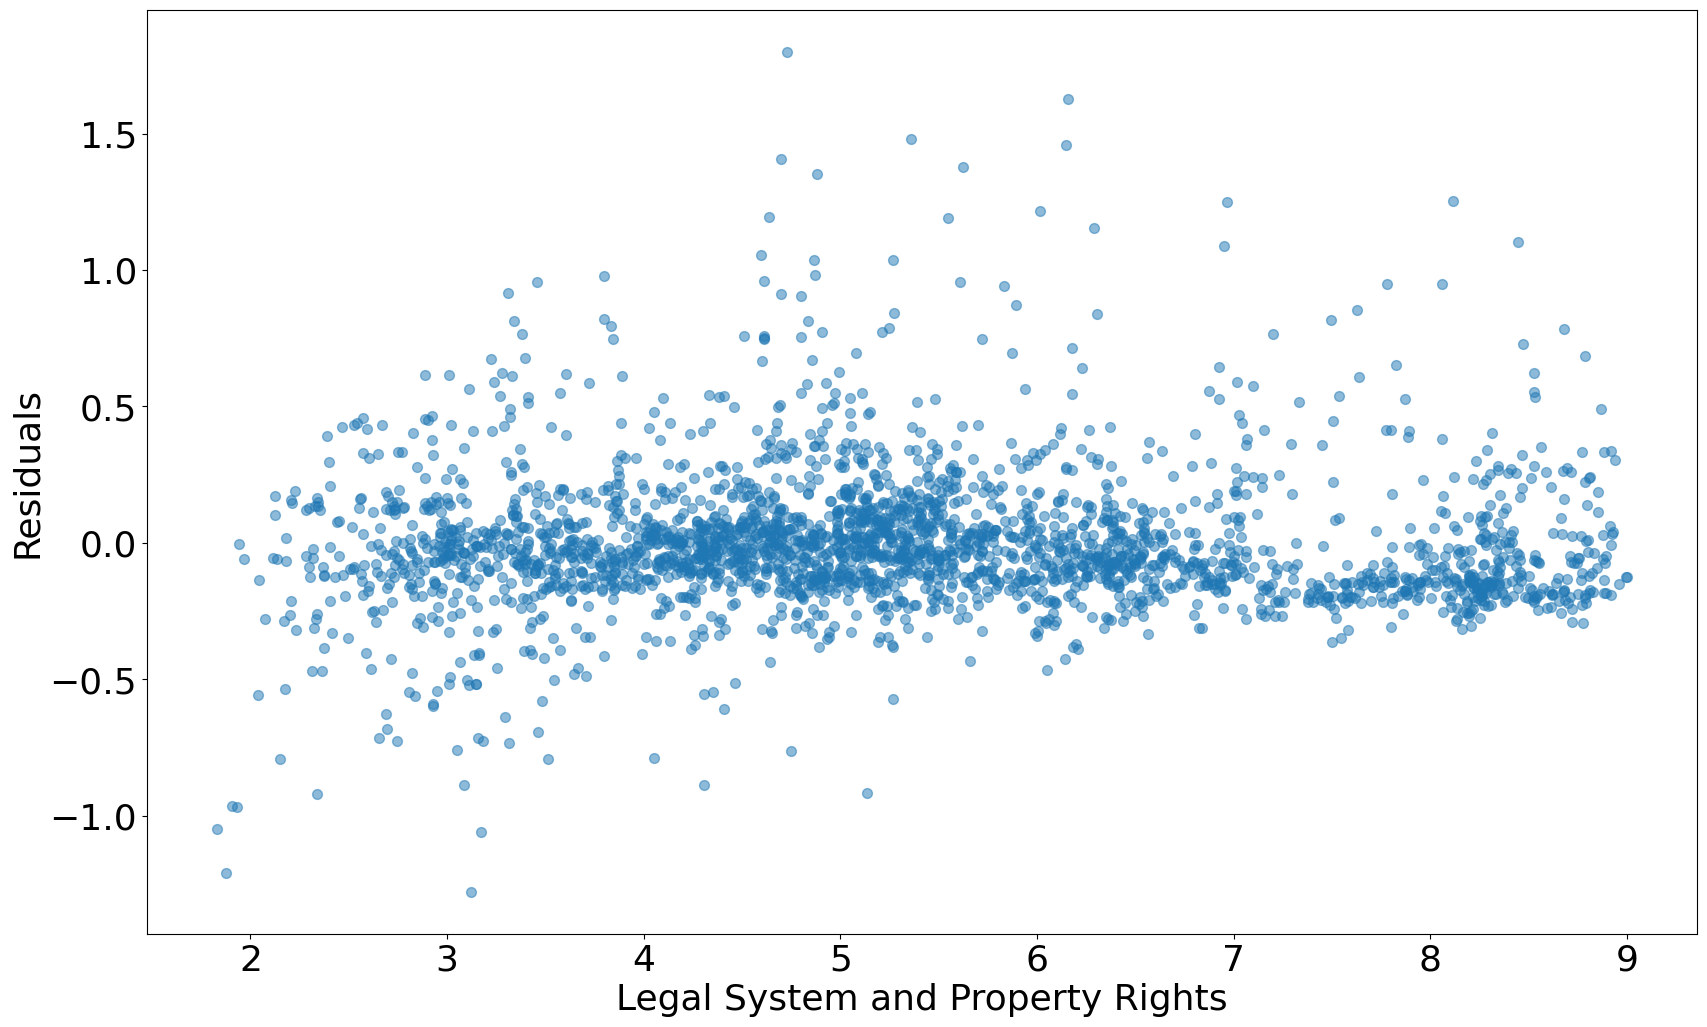

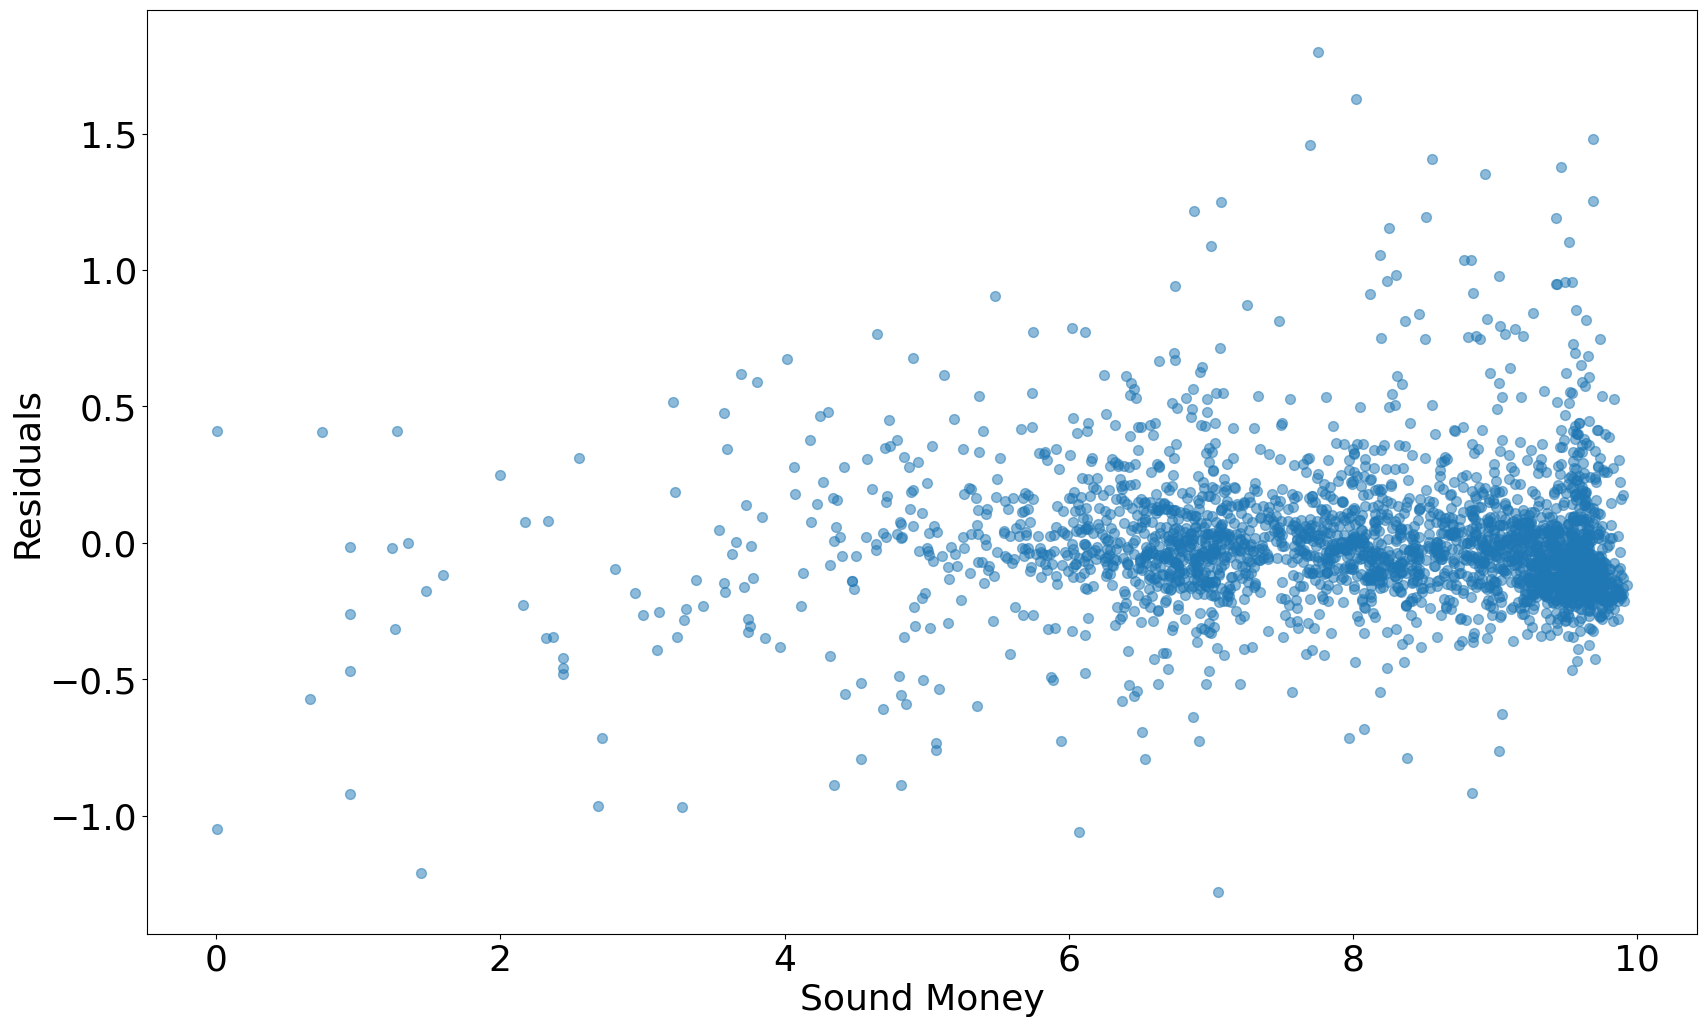

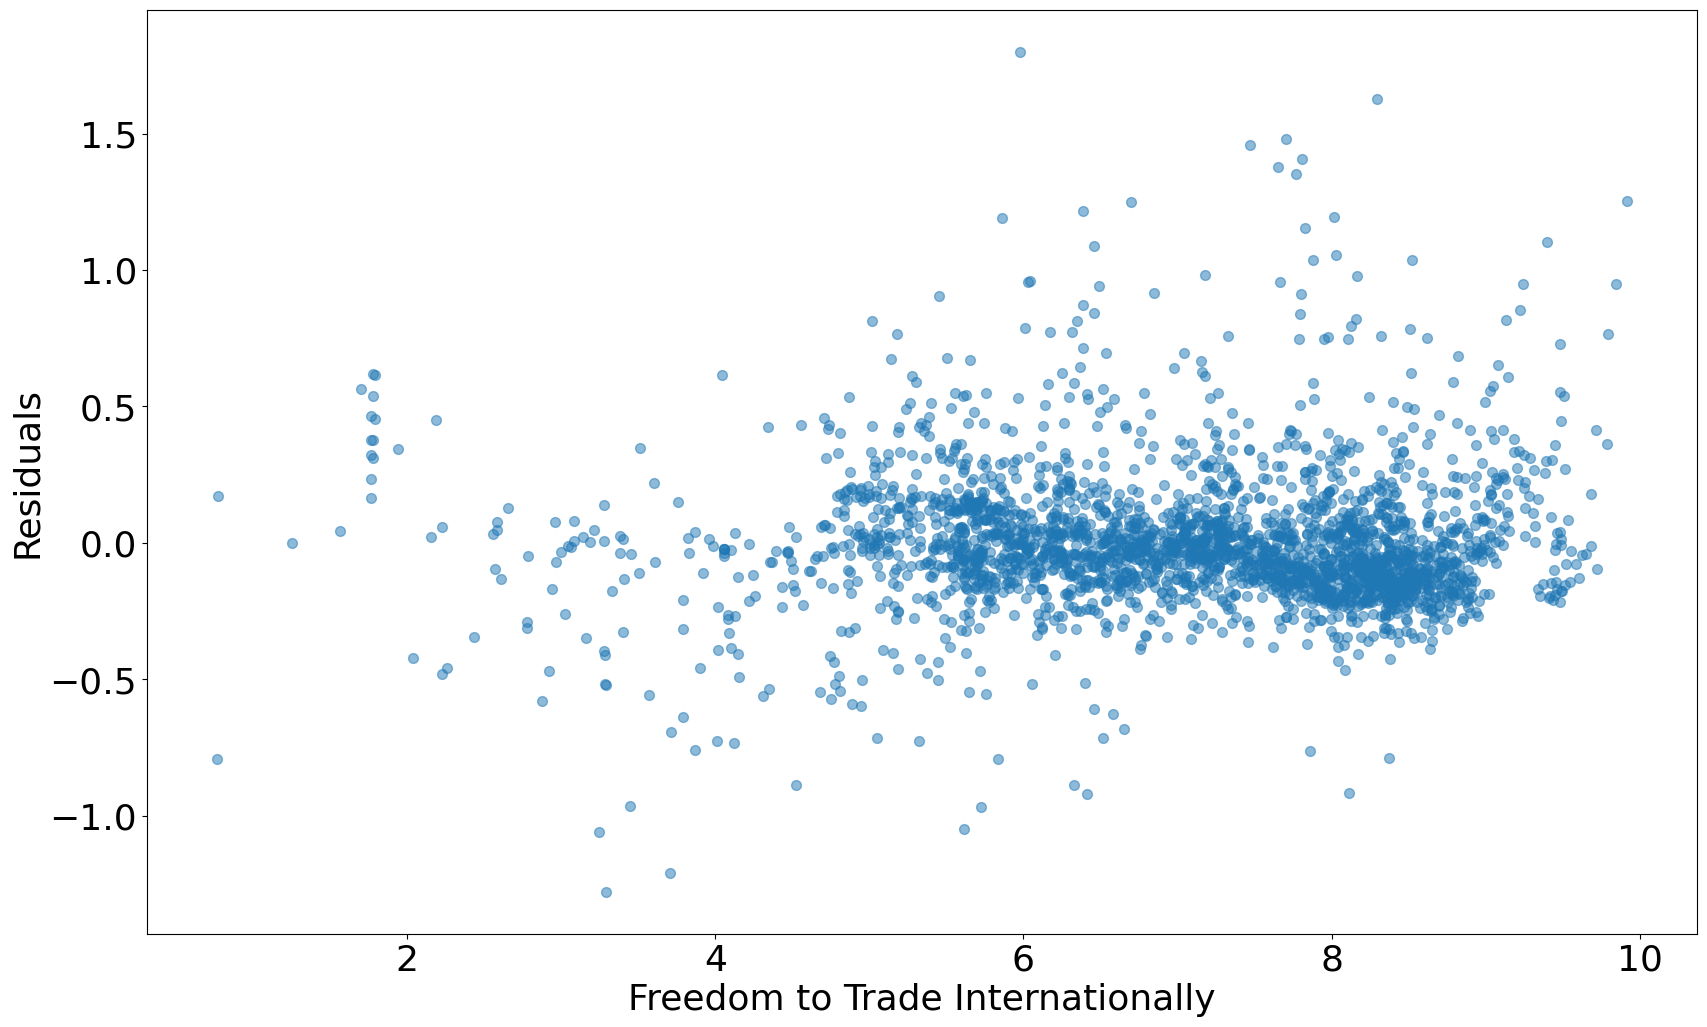

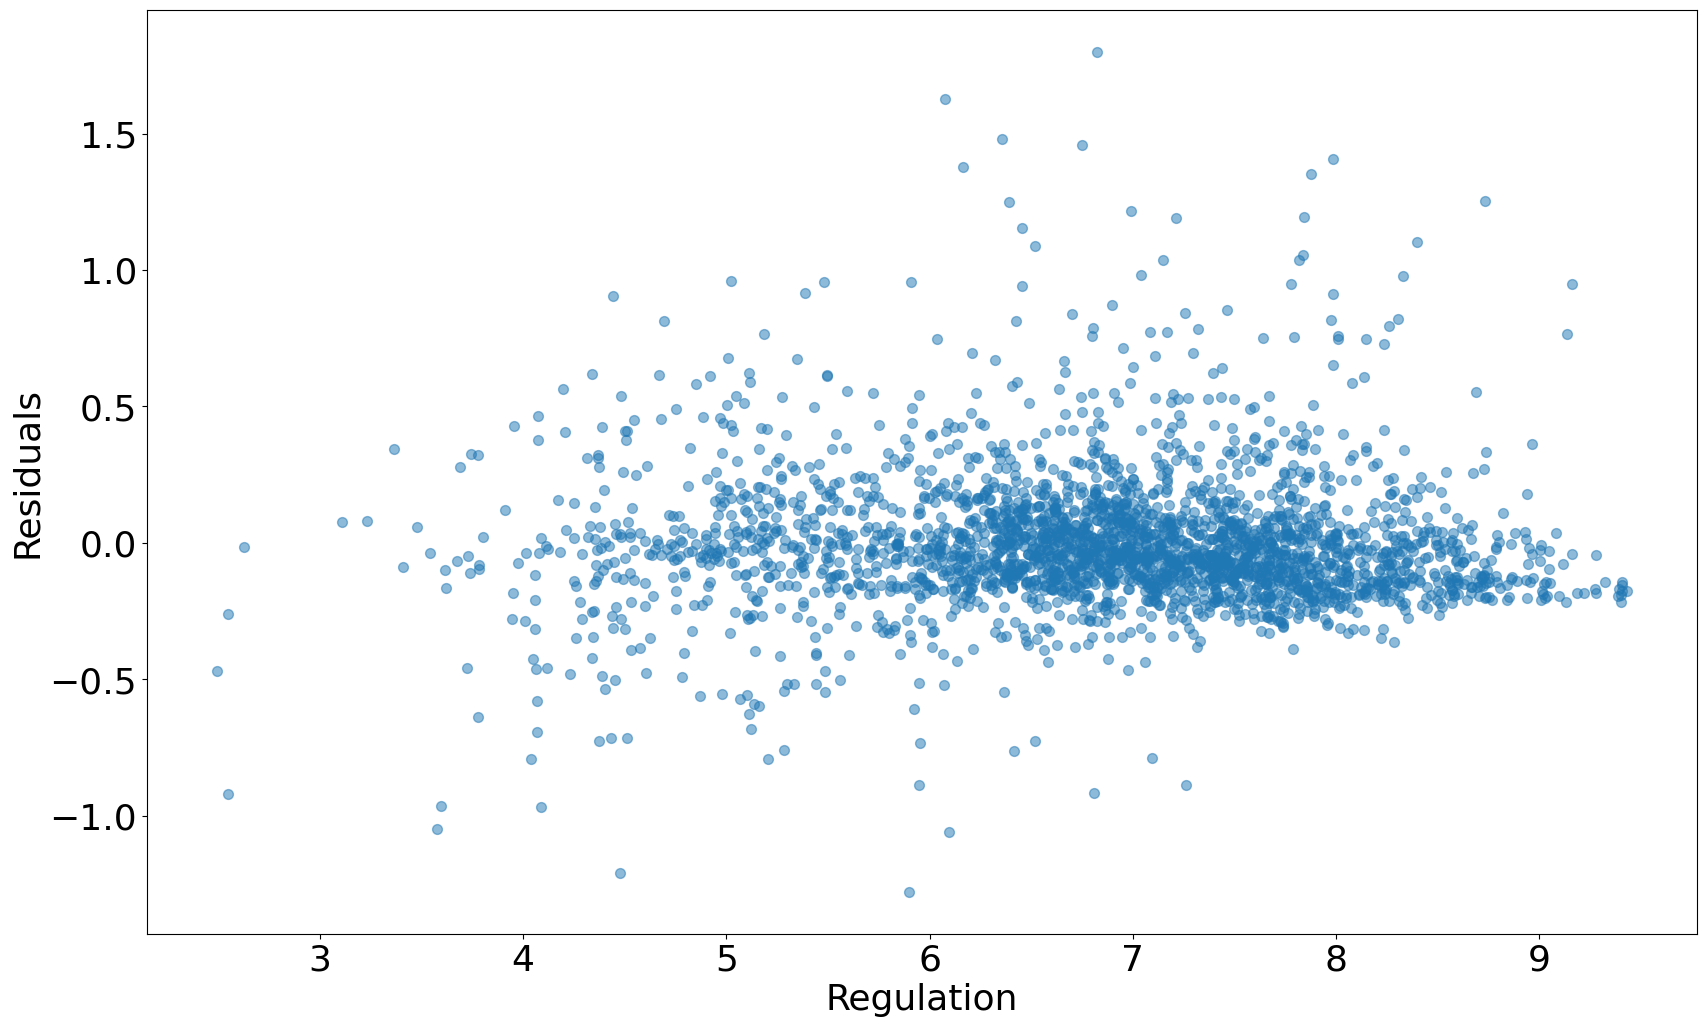

In [45]:
all_vars = y_var + x_vars 

for var in all_vars:
    fig, ax = plt.subplots(figsize = (20,12))
    r_df.plot.scatter(x = var,
                     y= "Residuals",
                     s = 50,
                     alpha = .5,
                     ax = ax)

In [57]:
for country in countries:
    try:
        plot_data = r_df.loc[country]
        fig, ax = plt.subplots(figsize = (20,10))
        plot_data[[y_var[0], "Predictor"]].add(1).cumprod().plot.line(ax = ax,
                                                           legend=True)
        ax.set_title(country)
    except:
        print(country + " does not appear to be in index")

NameError: name 'countries' is not defined

In [61]:
reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                           
AGO        1970    Angola       NaN                 NaN   
           1975    Angola       NaN                 NaN   
           1980    Angola       NaN                 NaN   
           1985    Angola       NaN                 NaN   
           1990    Angola       NaN                 NaN   
...                   ...       ...                 ...   
ZWE        2016  Zimbabwe  6.121996            5.332597   
           2017  Zimbabwe  5.599886            4.699843   
           2018  Zimbabwe  5.876298            5.170946   
           2019  Zimbabwe  4.719465            5.628359   
           2020  Zimbabwe  4.480000            5.562008   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        1970                               NaN          NaN   
           1975                               NaN          NaN   
           1980                               NaN          NaN   
           1985                               NaN          NaN   
           1990                               NaN          NaN   
...                                           ...          ...   
ZWE        2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   
           2019                          4.026568     1.413372   
           2020                          3.965267     1.250000   

                 Freedom to Trade Internationally  Regulation  RGDP Per Capita  
ISO_Code_3 Year                                                                 
AGO        1970                               NaN         NaN              NaN  
           1975                               NaN         NaN              NaN  
           1980                               NaN         NaN              NaN  
           1985                               NaN         NaN              NaN  
           1990                               NaN         NaN              NaN  
...                                           ...         ...              ...  
ZWE        2016                          6.404937    6.520805              NaN  
           2017                          4.503965    6.399757              NaN  
           2018                          6.396649    6.303135              NaN  
           2019                          6.397045    6.132583              NaN  
           2020                          5.565207    6.080774              NaN  

[4455 rows x 8 columns]

In [69]:
r_df = reg_data.copy()
# created a lag column
r_df["RGDP Per Capita Lag"] = reg_data[
    "RGDP Per Capita"].groupby("ISO_Code_3").shift(years_diff)
# drop any null values that would be added to the lag
r_df = r_df.dropna(axis = 0, how = "any")
x_vars.append("RGDP Per Capita Lag")
y = r_df.dropna(axis = 0, how = "any")[y_var]
X = r_df.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
results.summary()

C:\Users\adamp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\adamp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\adamp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\adamp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 18 Apr 2023   Prob (F-statistic):                nan
Time:                        12:05:36   Log-Likelihood:                 212.16
No. Observations:                   7   AIC:                            -410.3
Df Residuals:                       0   BIC:                            -410.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   2.3347        inf          0        nan         nan         nan
Legal System and Property Rights    -3.9064        inf         -0        nan         nan         nan
Sound Money                         -0.3485        inf         -0        nan         nan         nan
Freedom to Trade Internationally     5.7442        inf          0        nan         nan         nan
Regulation                           3.0799        inf          0        nan         nan         nan
RGDP Per Capita Lag                  0.0331        inf          0        nan         nan         nan
RGDP Per Capita Lag                  0.0331        inf          0        nan         nan         nan
RGDP Per Capita Lag                  0.0331        inf          0        nan         nan         nan
RGDP Per Capita Lag                  0.0331        inf          0        nan         nan         nan
RGDP Per Capita Lag                  0.0331        inf          0        nan         nan         nan
RGDP Per Capita Lag                  0.0331        inf          0        nan         nan         nan
Constant                           -51.8570        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.392
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.751
Skew:                          -0.592   Prob(JB):                        0.687
Kurtosis:                       1.917   Cond. No.                     6.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
x_vars

['Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation']

<AxesSubplot:ylabel='Frequency'>

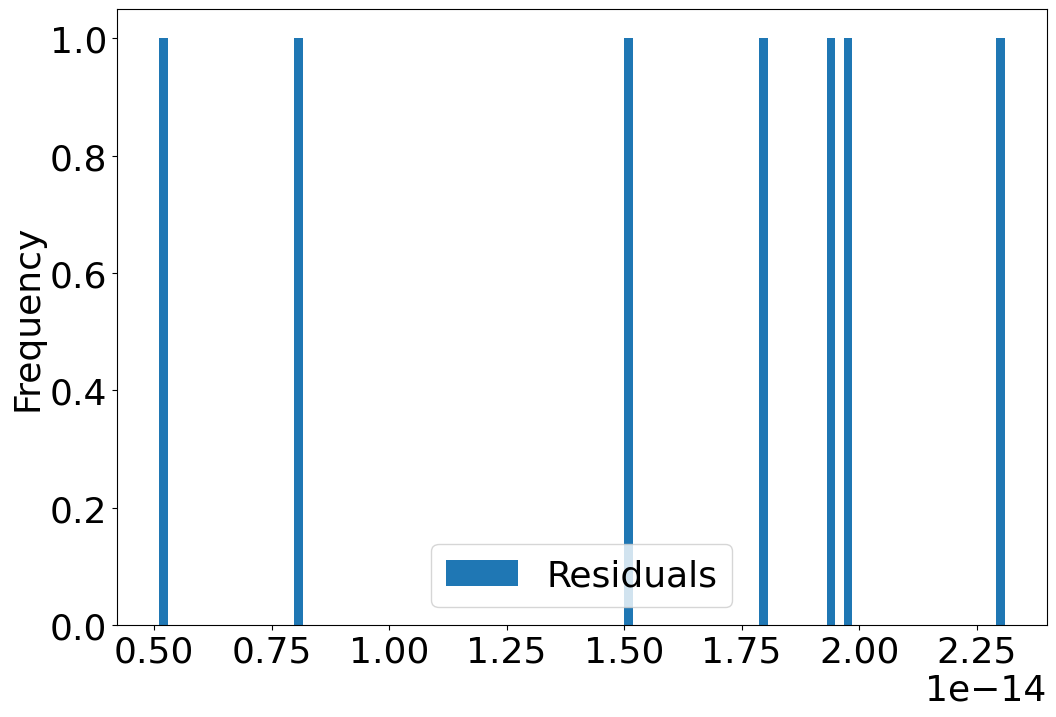

In [70]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))
r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

KeyError: 'Predictor'

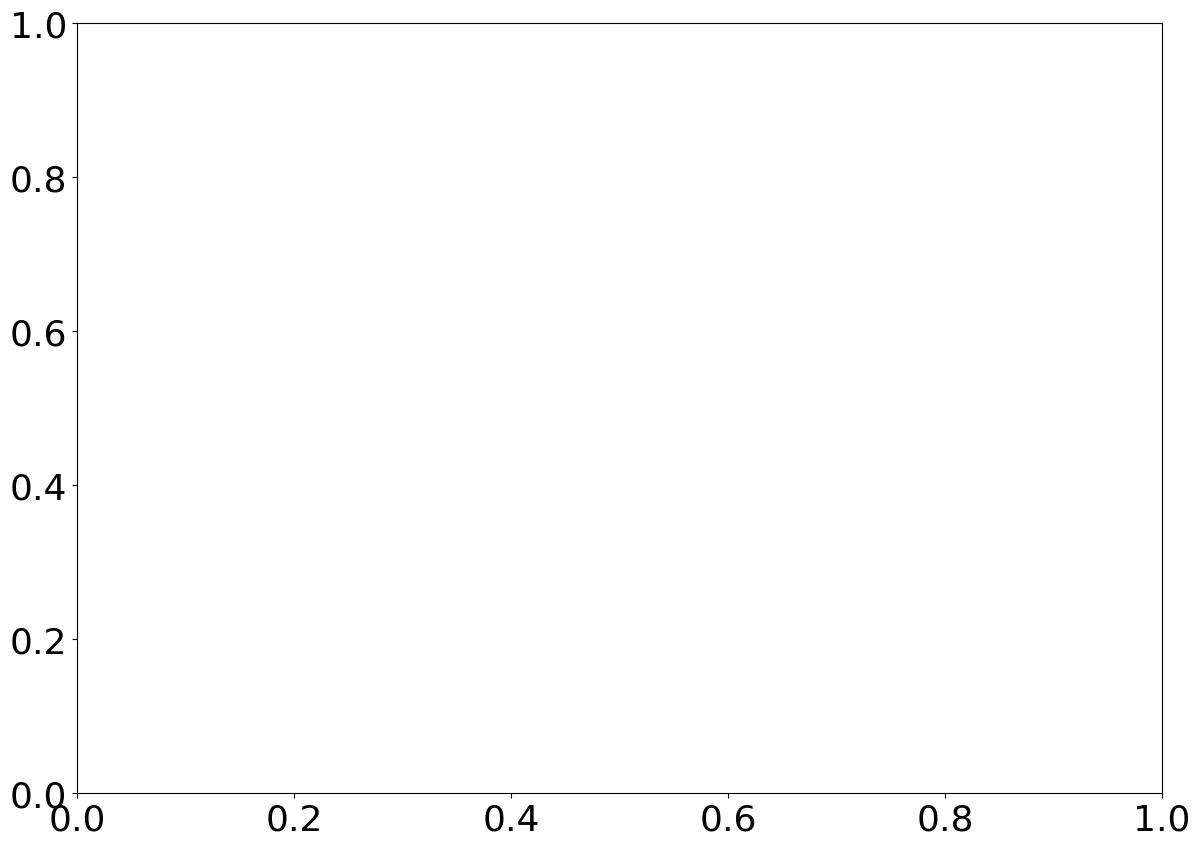

In [71]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

# cycle through all variables included in regression
# 
for var in y_var + x_vars:
    fig, ax = plt.subplots(figsize = (14,10))
    reg_data.plot.scatter(x = y_var[0],
                         y = "Residuals", 
                          s = 30, ax = ax)
    ax.axhline(0, ls = "--", color = "k")
    plt.xticks(rotation=90)
    plt.show()
    plt.close()

In [74]:
del r_df["Predictor"]
del r_df["Residuals"]
del r_df["RGDP Per Capita Lag"]
# delete "RGDP Per Capita Lag from r_df, the column is the last one"
x_vars = r_df.keys()[2:7]
r_df

KeyError: 'Predictor'

In [75]:

r_df[y_var + x_vars].groupby("ISO_Code_3").diff(years_diff())

TypeError: 'int' object is not callable

In [76]:
x_vars = list(r_df.keys()[2:7])
y_var = [r_df.keys()[7]]
r_df = r_df[y_var + x_vars].groupby("ISO_Code_3").diff(years_diff).dropna()


,,RGDP Per Capita,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation
ISO_Code_3,Year,,,,,,


In [77]:
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
results.summary()

C:\Users\adamp\AppData\Local\Temp\ipykernel_23840\940083614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\adamp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     6.284
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.294
Time:                        12:27:50   Log-Likelihood:                 2.2826
No. Observations:                   7   AIC:                             7.435
Df Residuals:                       1   BIC:                             7.110
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   1.2443      4.668      0.267      0.834     -58.071      60.560
Legal System and Property Rights    -2.0674      7.070     -0.292      0.819     -91.905      87.770
Sound Money                          0.0900      1.286      0.070      0.956     -16.249      16.429
Freedom to Trade Internationally     3.0562     10.435      0.293      0.819    -129.536     135.649
Regulation                           2.1897      3.514      0.623      0.645     -42.460      46.840
Constant                           -33.3686     79.880     -0.418      0.748   -1048.341     981.604
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.596
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.068
Skew:                           0.229   Prob(JB):                        0.967
Kurtosis:                       3.155   Cond. No.                     6.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Frequency'>

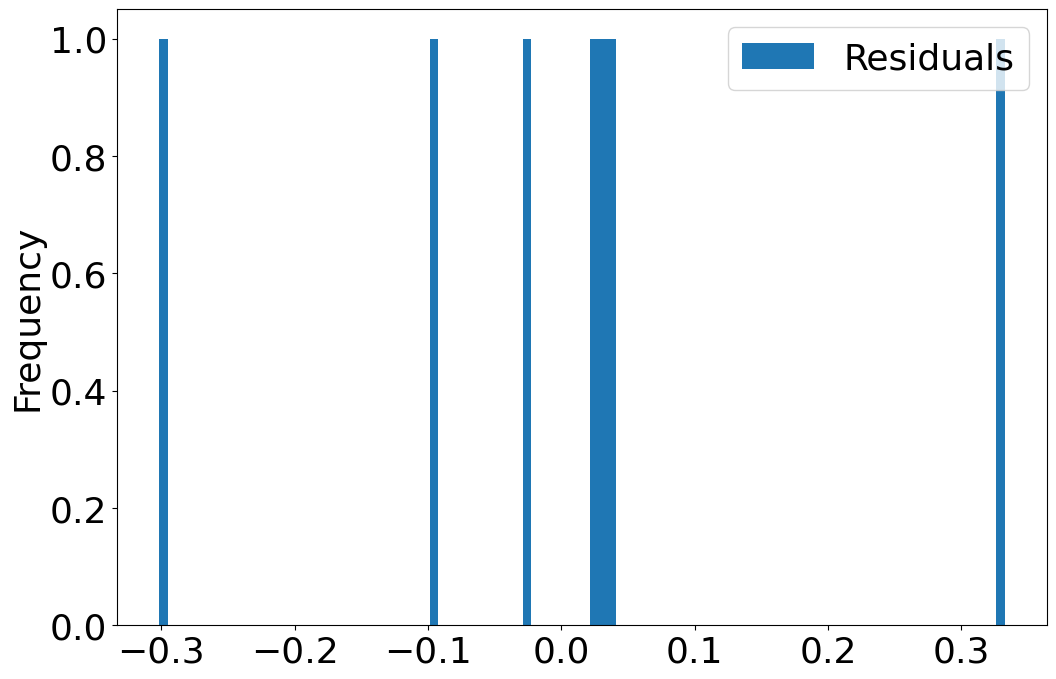

In [78]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

KeyError: 'Predictor'

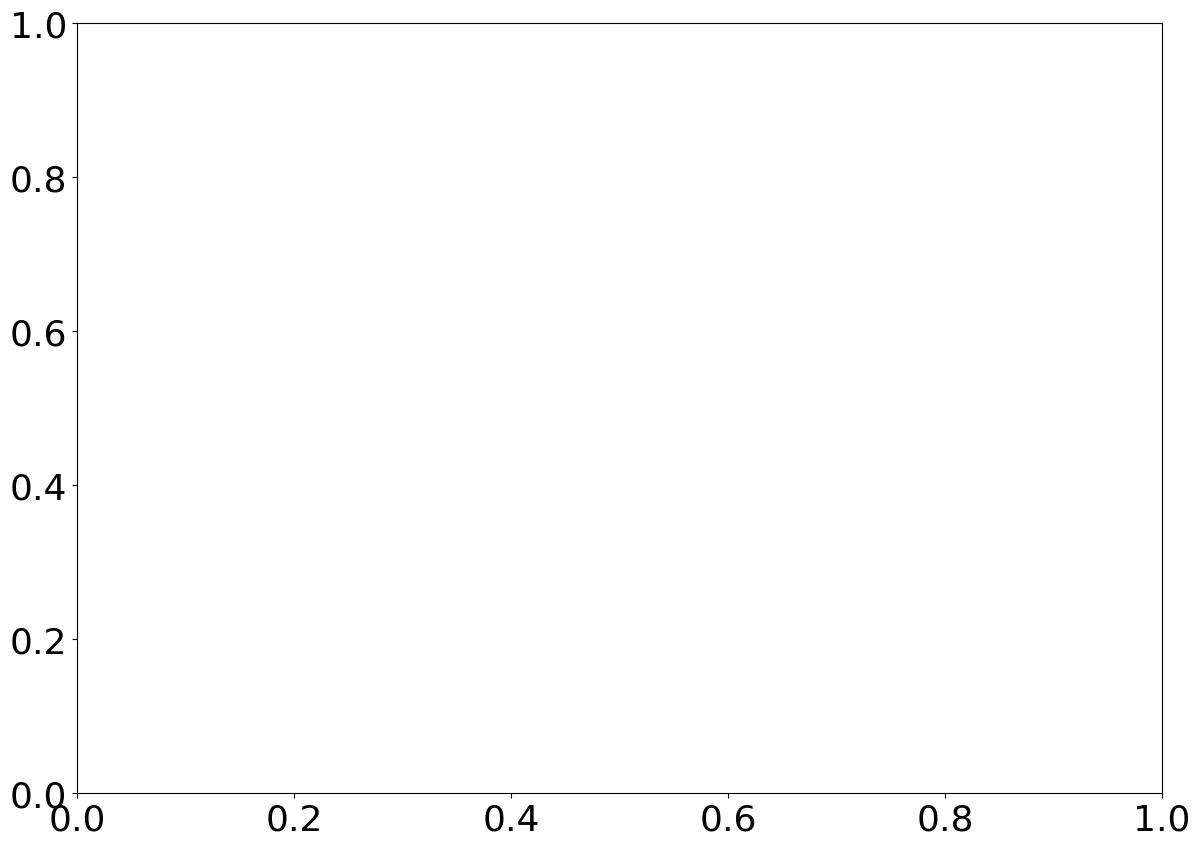

In [81]:
def plot_residuals(df, y_var, x_vars):
    fig, ax = plt.subplots(figsize = (14,10))
    reg_data.plot.scatter(x = y_var[0],
                     y = "Predictor", 
                      s = 30, ax = ax)
    plt.xticks(rotation=90)
    plt.show()
    plt.close()

    # cycle through all variables included in regression
    # 
    for var in y_var + x_vars:
        fig, ax = plt.subplots(figsize = (14,10))
        df.plot.scatter(x = y_var[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
        ax.axhline(0, ls = "--", color = "k")
        plt.xticks(rotation=90)
        plt.show()
        plt.close()
plot_residuals(r_df, y_var, x_vars)